In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for year in misinfotext_file.sheet_names:
        df = pd.read_excel(misinfotext_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["Count"] / df["Count"].sum()
        
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for year in fakespeak_file.sheet_names:
        df = pd.read_excel(fakespeak_file, sheet_name=year)
        
        df["year"] = year
        df["proportion"] = df["Count"] / df["Count"].sum()
        
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [3]:
def get_ranked_proportion_df(df: pd.DataFrame):
    return  df\
            .groupby("Entity")["proportion"]\
            .sum()\
            .reset_index()\
            .sort_values(
                by="proportion", 
                ascending=False
            )

In [4]:
def get_entity_proportion_in_year(df: pd.DataFrame, year: str, entity: str):
    matches = df[(df["year"] == year) & (df["Entity"] == entity)]
    
    if matches.shape[0] == 0:
        return 0
    
    return matches["proportion"].iloc[0]

In [ ]:
NUM_ENTITIES = 5
years = range(2009, 2025)

def plot_and_save_entities_plot(misinfotext_path: str, fakespeak_path: str, title_template: str, save_path: str):
    full_df = get_full_df(misinfotext_path, fakespeak_path)
    
    ranked_prop_df = get_ranked_proportion_df(full_df)

    top_entities = ranked_prop_df["Entity"].head(NUM_ENTITIES)
    
    plt.figure(figsize=(12, 6))

    for entity in top_entities:
        data = [
                get_entity_proportion_in_year(full_df, str(year), entity)
                for year in years
        ]

        plt.plot(years, data, marker="o")

    plt.xticks(list(years), rotation=45)
    
    plt.legend(top_entities)

    plt.title(title_template.replace("NUM_ENTITIES", str(NUM_ENTITIES)))
    plt.xlabel("year")
    plt.ylabel("proportion of total entity counts")

    plt.savefig(save_path)

    plt.show()

### Generate line plots for entities in body text

All text types

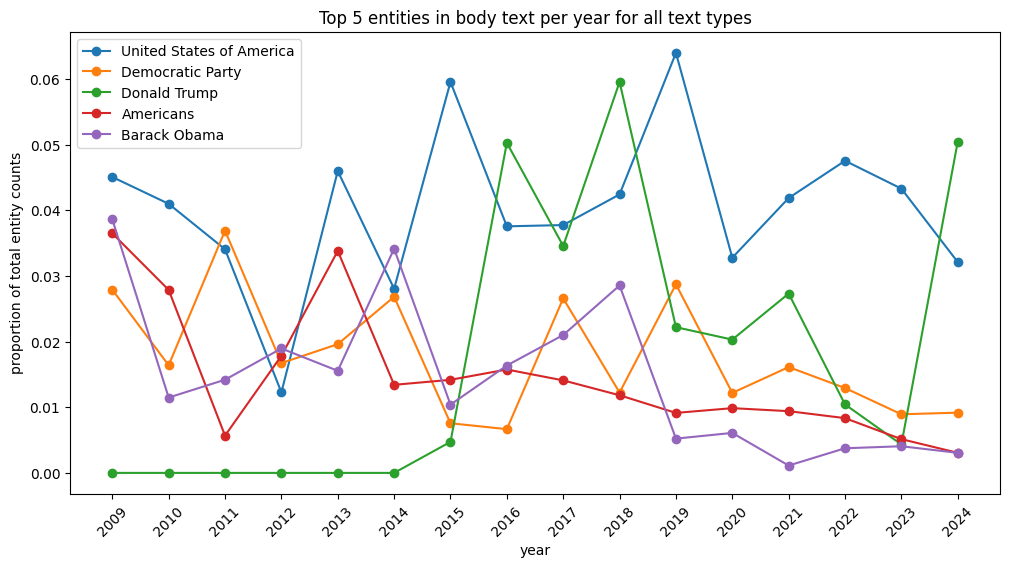

In [11]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_named_entities_frequency.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_named_entities_frequency.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for all text types",
    save_path="./visualization/NER/plots_over_time/all_types.png"
)

News and blog

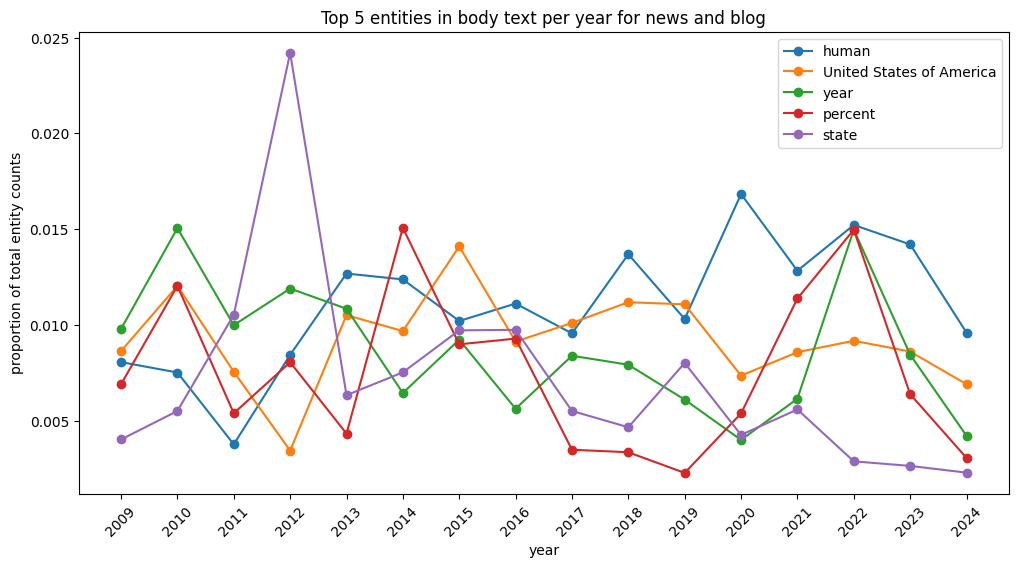

In [12]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_named_entities_frequency.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_named_entities_frequency.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for news and blog",
    save_path="./visualization/NER/plots_over_time/news_and_blog.png"
)

Press release

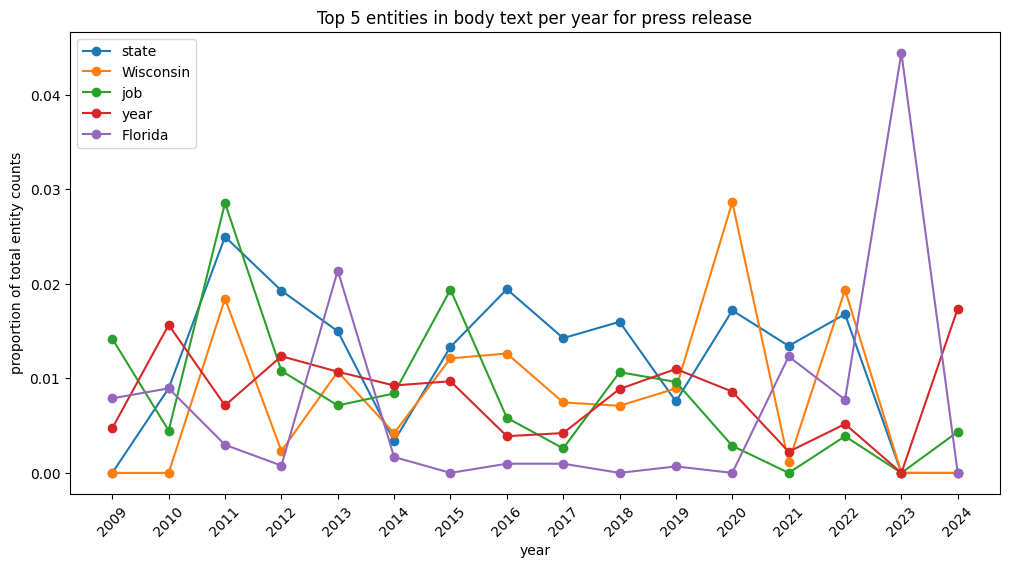

In [13]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_named_entities_frequency.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_named_entities_frequency.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for press release",
    save_path="./visualization/NER/plots_over_time/press_release.png"
)

Social media

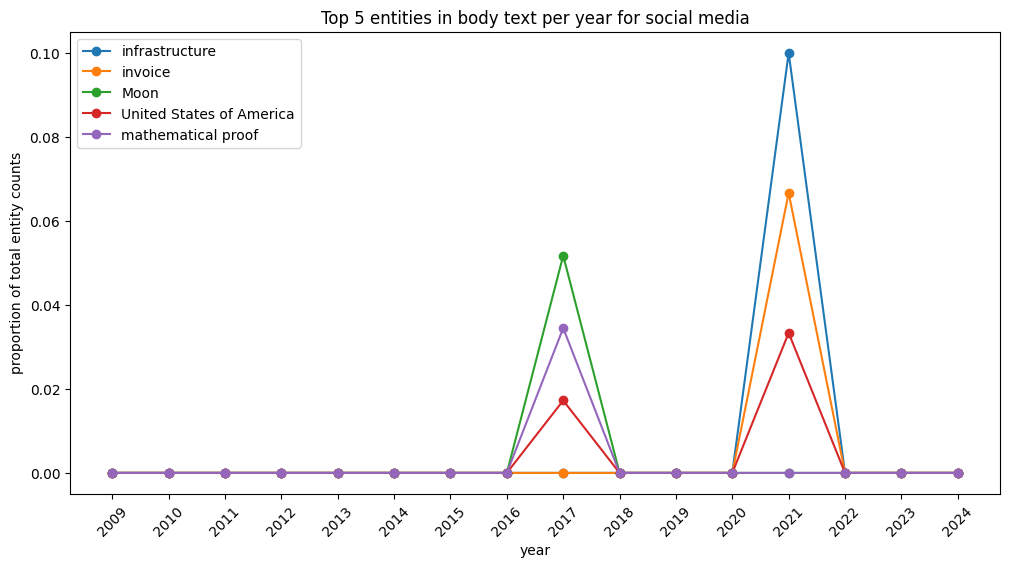

In [14]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_named_entities_frequency.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_named_entities_frequency.xlsx",
    title_template="Top NUM_ENTITIES entities in body text per year for social media",
    save_path="./visualization/NER/plots_over_time/social_media.png"
)

### Generate wordclouds for entities in headline text

All text types

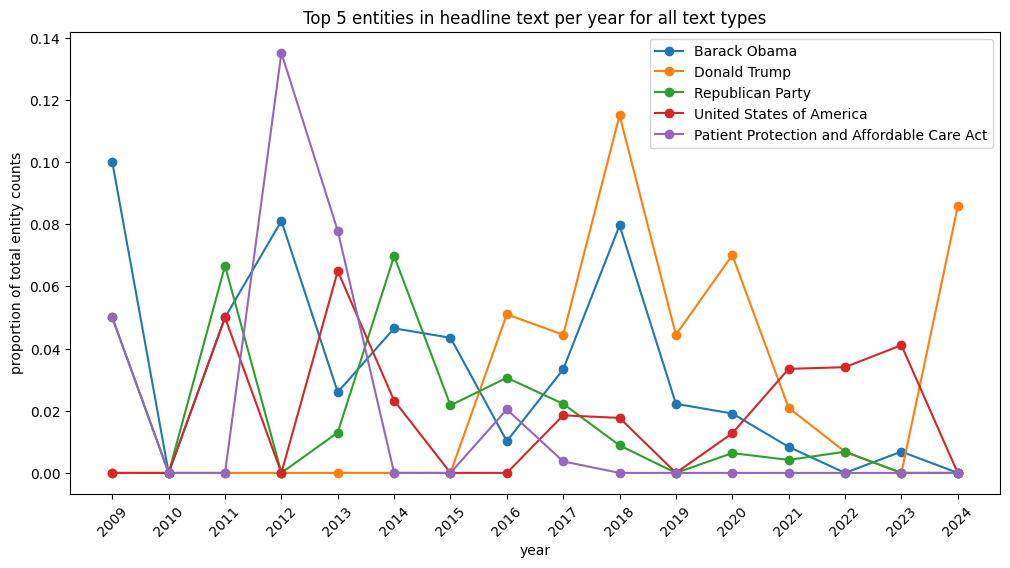

In [15]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_named_entities_frequency_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_named_entities_frequency_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for all text types",
    save_path="./visualization/NER/plots_over_time/all_types_headlines.png"
)

News and blog

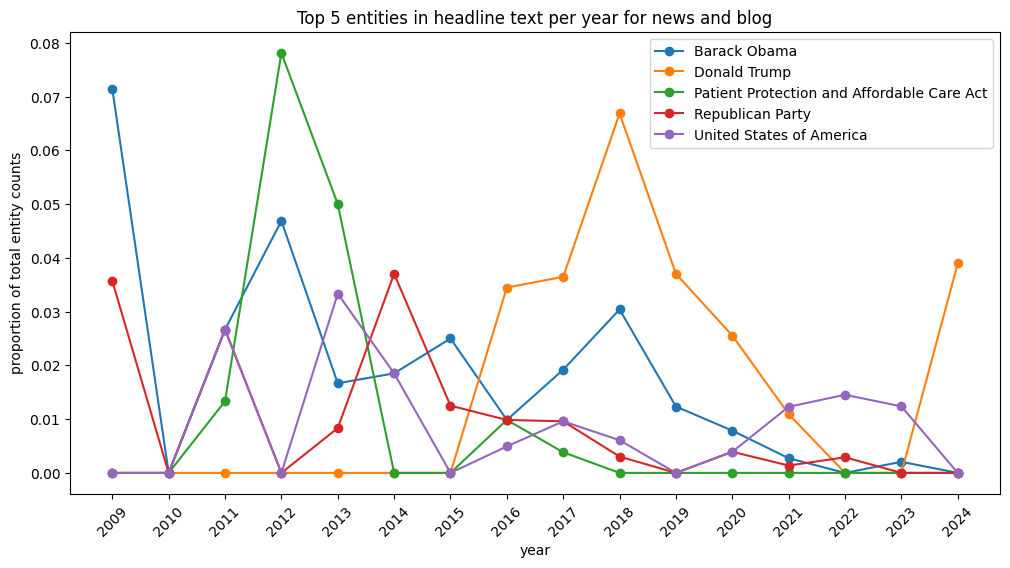

In [16]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_named_entities_frequency_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_named_entities_frequency_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for news and blog",
    save_path="./visualization/NER/plots_over_time/news_and_blog_headlines.png"
)

Press release

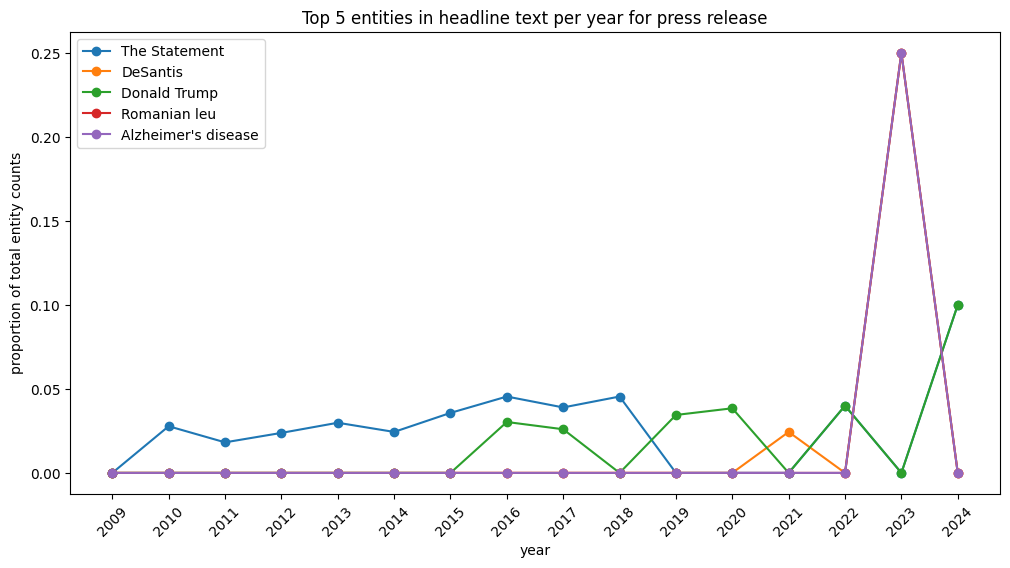

In [17]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_named_entities_frequency_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_named_entities_frequency_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for press release",
    save_path="./visualization/NER/plots_over_time/press_release_headlines.png"
)

Social media (not very interesting because almost all social media articles don't have headlines)

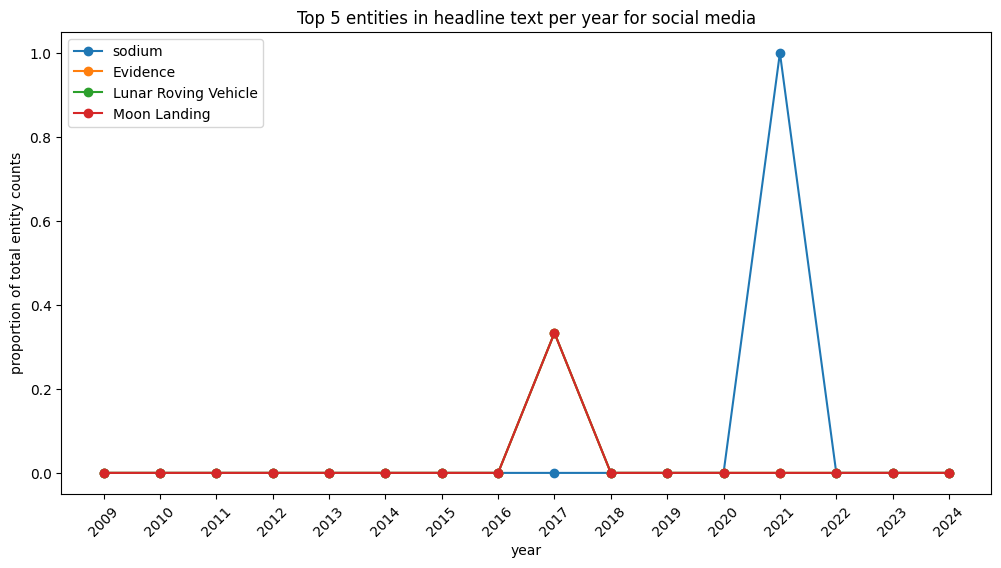

In [18]:
plot_and_save_entities_plot(
    misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_named_entities_frequency_headlines.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_named_entities_frequency_headlines.xlsx",
    title_template="Top NUM_ENTITIES entities in headline text per year for social media",
    save_path="./visualization/NER/plots_over_time/social_media_headlines.png"
)